<a href="https://colab.research.google.com/github/DAGGUBILLISURESH/Spark-foundation-tasks/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Suresh Daggubilli
# Task 4 : Exploratory data analysis - Terrorism
# GRIP @ The Sparks Foundation
# New Section

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.196000e+04,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,...,3.500000e+02,1.0,8.100000e+01,1.0,518.000000,400.000000,11959.000000,11959.000000,11959.000000,11959.000000
mean,1.976790e+11,1976.726338,6.170569,15.243227,0.023411,205.097910,5.881355,31.330726,-22.842727,1.213796,...,4.202714e+06,20000.0,1.461872e+06,0.0,2.839768,5.982500,-3.326532,-3.278284,0.310059,-2.122335
std,3.022204e+08,3.024931,3.338024,8.942614,0.151212,181.789798,3.326011,22.026742,54.525074,0.841495,...,5.377014e+07,NaN,5.045784e+06,NaN,1.265294,23.322243,4.476546,4.525668,0.663122,4.364938
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.975050e+11,1975.000000,3.000000,8.000000,0.000000,83.000000,2.000000,14.622869,-75.416953,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.978022e+11,1978.000000,6.000000,15.000000,0.000000,155.000000,8.000000,39.930771,-5.956210,1.000000,...,0.000000e+00,20000.0,8.000000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.979073e+11,1979.000000,9.000000,23.000000,0.000000,217.000000,8.000000,45.434336,11.346518,1.000000,...,4.132500e+05,20000.0,1.000000e+06,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.980093e+11,1980.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 12.3+ MB


# Expolratory Data Analysis

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [6]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [7]:
col = [x for x in data.columns]

print(col)

['Year', 'Month', 'day', 'Country', 'State', 'Region', 'City', 'latitude', 'longitude', 'Attacktype', 'kill', 'Wound', 'target1', 'summary', 'Group', 'Targettype', 'Weapon', 'motive']


In [8]:
data[['Year','Country','Attacktype']].nunique()

Year           11
Country       117
Attacktype      9
dtype: int64

In [9]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            42
Region            0
City              0
latitude        390
longitude       390
Attacktype        0
kill           1535
Wound          2865
target1         118
summary       11072
Group             1
Targettype        0
Weapon            1
motive        11337
dtype: int64

In [10]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [11]:
data['Casualities'] = data['kill'] + data['Wound']

In [12]:
data['Casualities'] = data['kill'] + data['Wound']

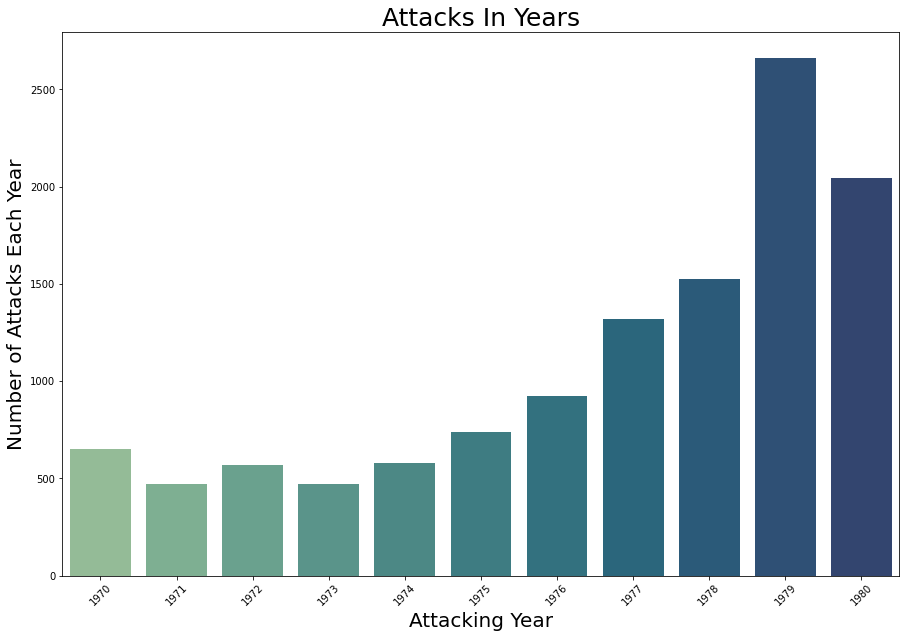

In [13]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
sns.barplot(x = year, y = years_count, palette = "crest")
plt.xticks(rotation = 45)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize= 25)
plt.show()


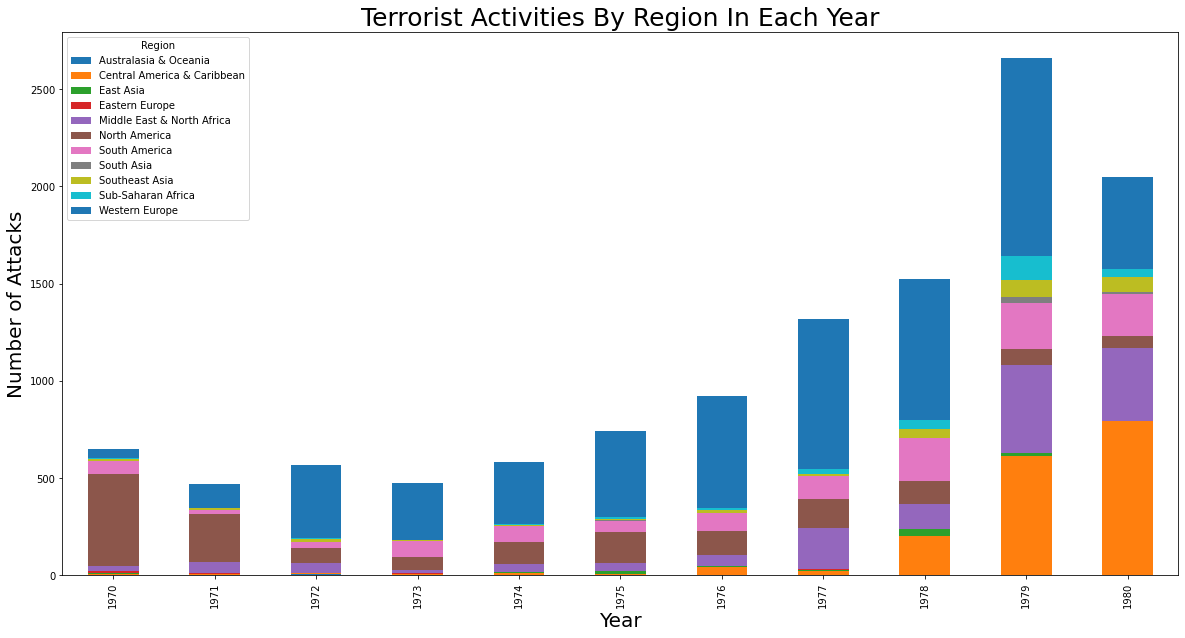

In [14]:
pd.crosstab(data.Year, data.Region).plot(kind='bar',stacked= True,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

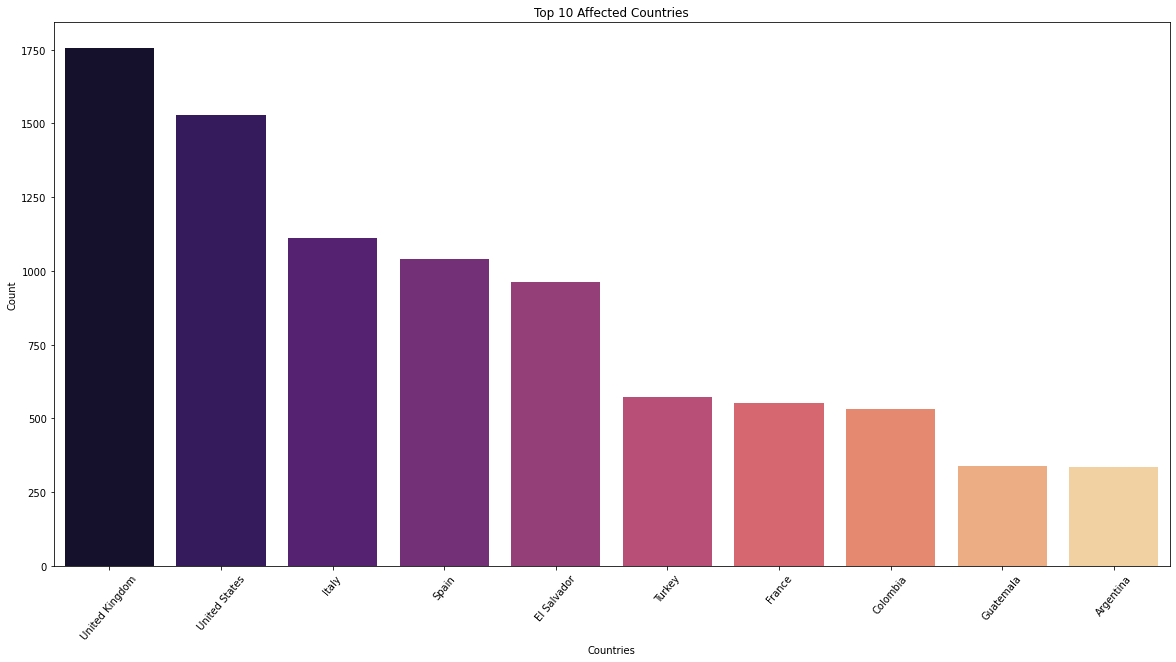

In [15]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette= 'magma')
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

In [16]:
city = data['City'].value_counts()[0:50]
city.head()
#Neglecting the unknown cities
city = city[1:20]

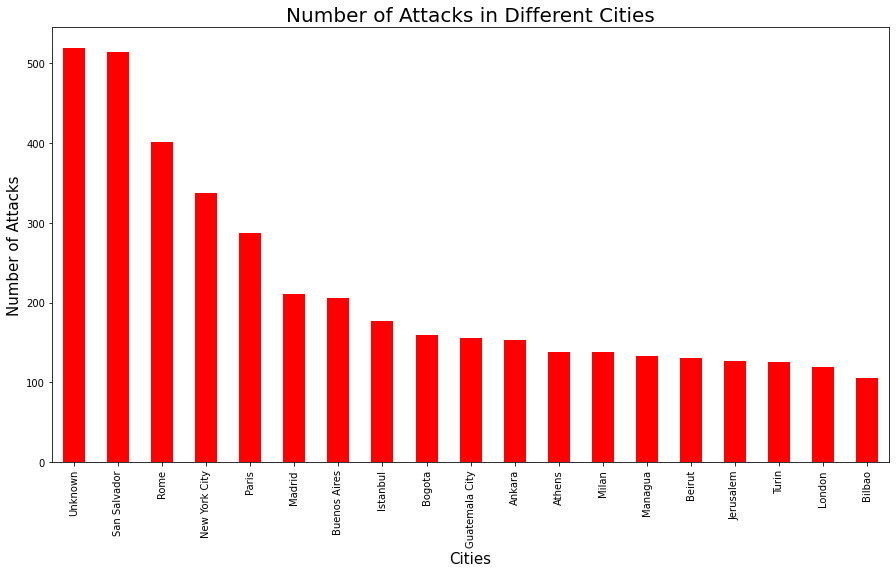

In [17]:
city = city.transpose()
city.plot(kind="bar",  figsize=(15,8),color=['red'] )
plt.title("Number of Attacks in Different Cities", fontsize = 20)
plt.ylabel("Number of Attacks", fontsize = 15)
plt.xlabel("Cities", fontsize = 15)
plt.show()


In [18]:
attack = data.Country.value_counts()[:10]
attack

United Kingdom    1755
United States     1527
Italy             1112
Spain             1042
El Salvador        963
Turkey             571
France             552
Colombia           531
Guatemala          339
Argentina          334
Name: Country, dtype: int64

In [19]:
data.Group.value_counts()[1:10]

Irish Republican Army (IRA)                    1106
Basque Fatherland and Freedom (ETA)             532
Palestinians                                    227
Protestant extremists                           205
Sandinista National Liberation Front (FSLN)     197
Red Brigades                                    177
Ulster Volunteer Force (UVF)                    173
Left-Wing Militants                             170
People's Liberation Forces (FPL)                167
Name: Group, dtype: int64

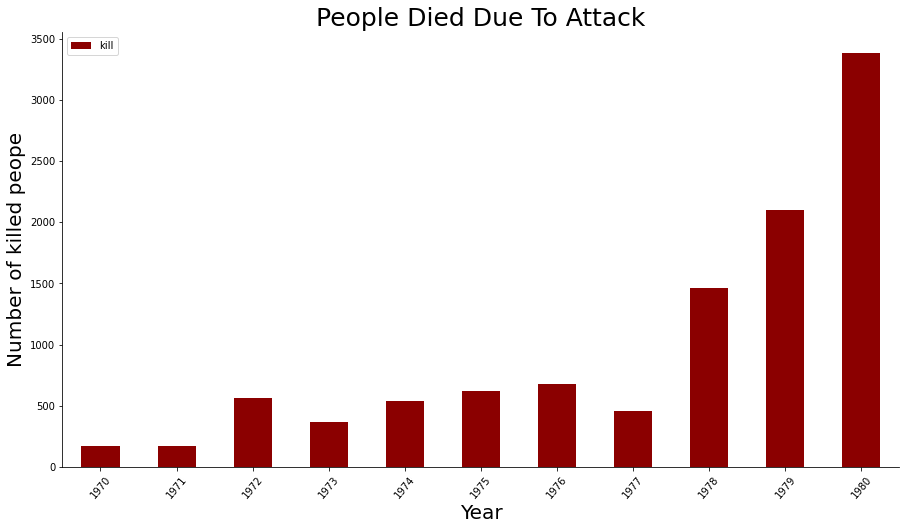

In [20]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(15,8))
df.plot(kind='bar',ax=ax4, color = 'darkred')
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)


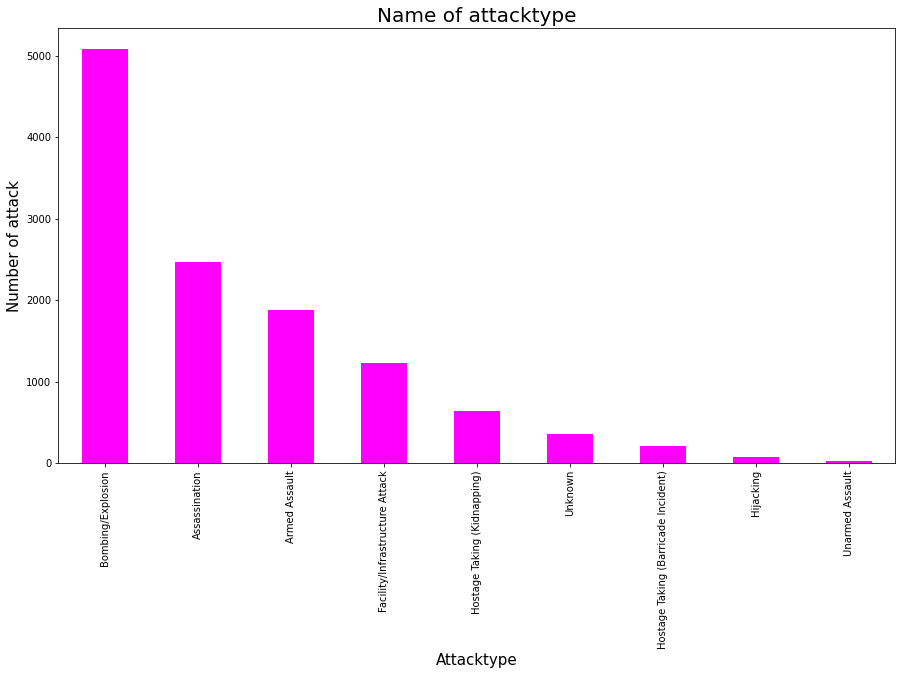

In [21]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(15,8),color='magenta')
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

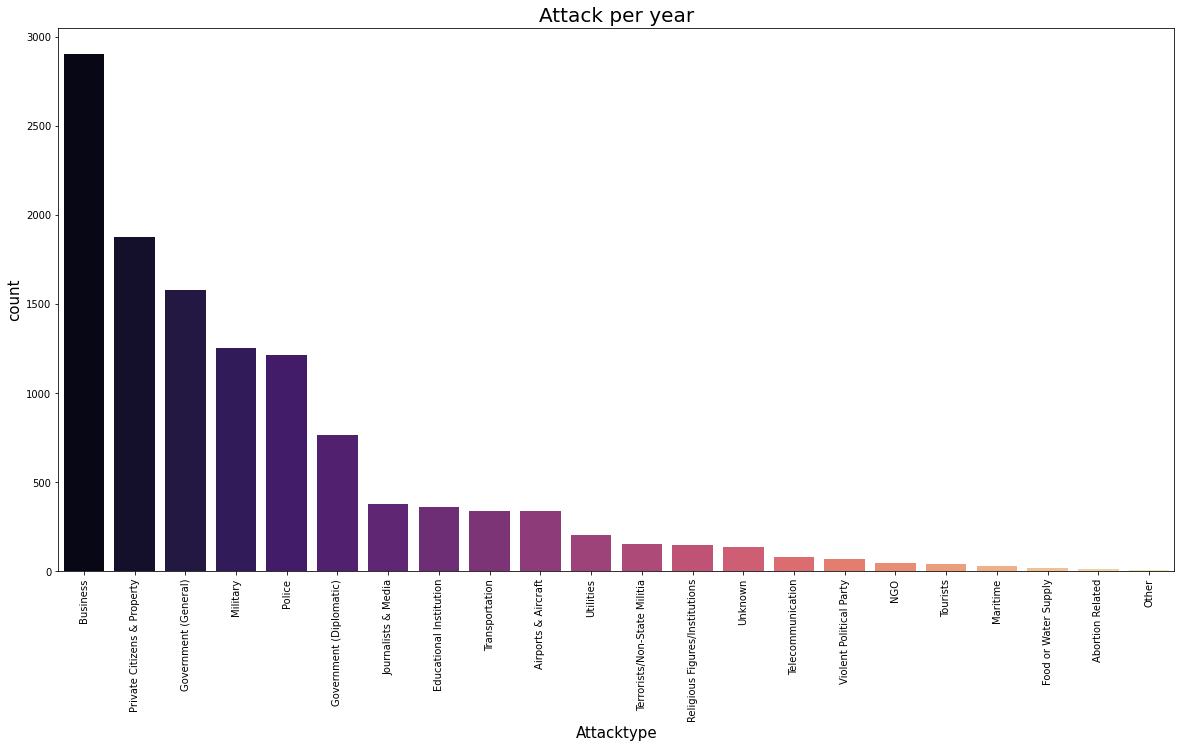

In [22]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="magma");
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

In [23]:
attack_type = data['Attacktype'].value_counts()
attack_type

Bombing/Explosion                      5084
Assassination                          2467
Armed Assault                          1879
Facility/Infrastructure Attack         1227
Hostage Taking (Kidnapping)             641
Unknown                                 354
Hostage Taking (Barricade Incident)     211
Hijacking                                70
Unarmed Assault                          27
Name: Attacktype, dtype: int64

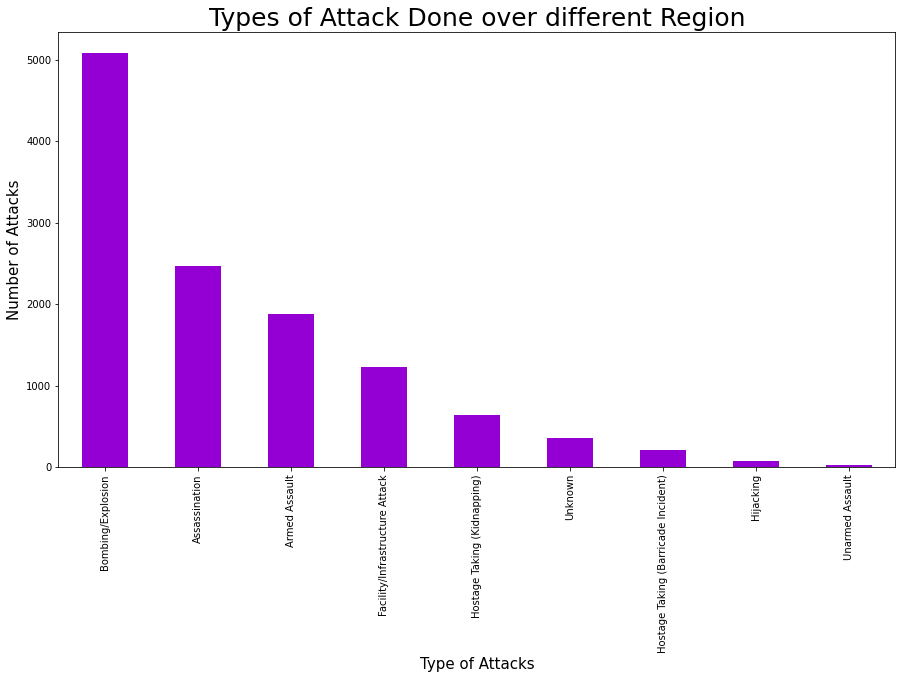

In [24]:
attack_type = attack_type.transpose()
attack_type.plot(kind='bar', figsize=(15,8),color=['darkviolet'])
plt.xlabel("Type of Attacks", fontsize = 15)
plt.ylabel("Number of Attacks", fontsize = 15)
plt.title("Types of Attack Done over different Region", fontsize = 25)
plt.show()

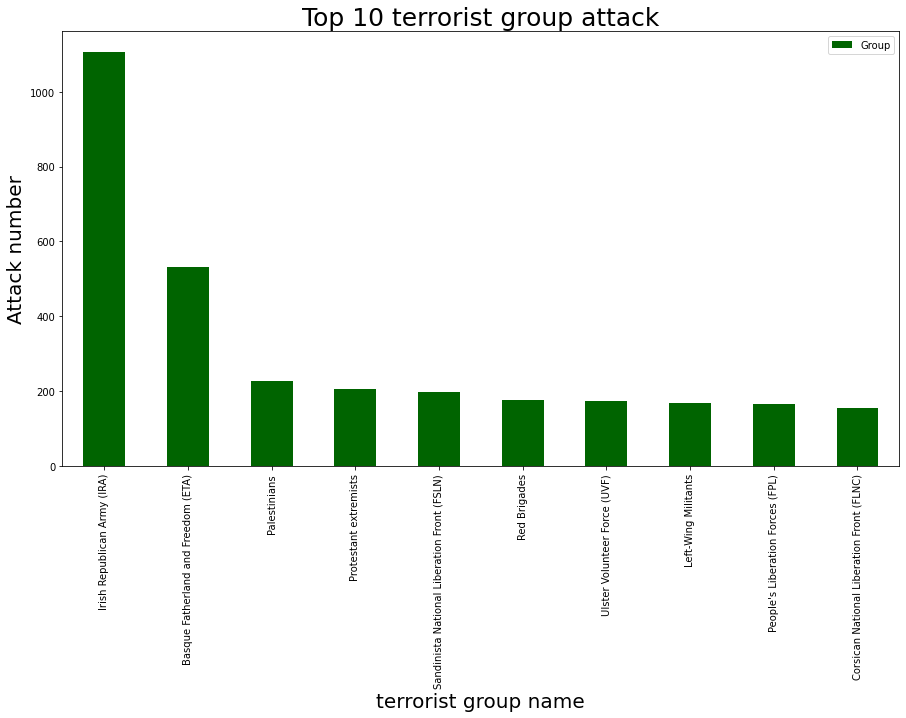

In [25]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='darkgreen',figsize=(15, 8))
plt.title("Top 10 terrorist group attack",fontsize= 25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("Attack number",fontsize=20)
plt.show()

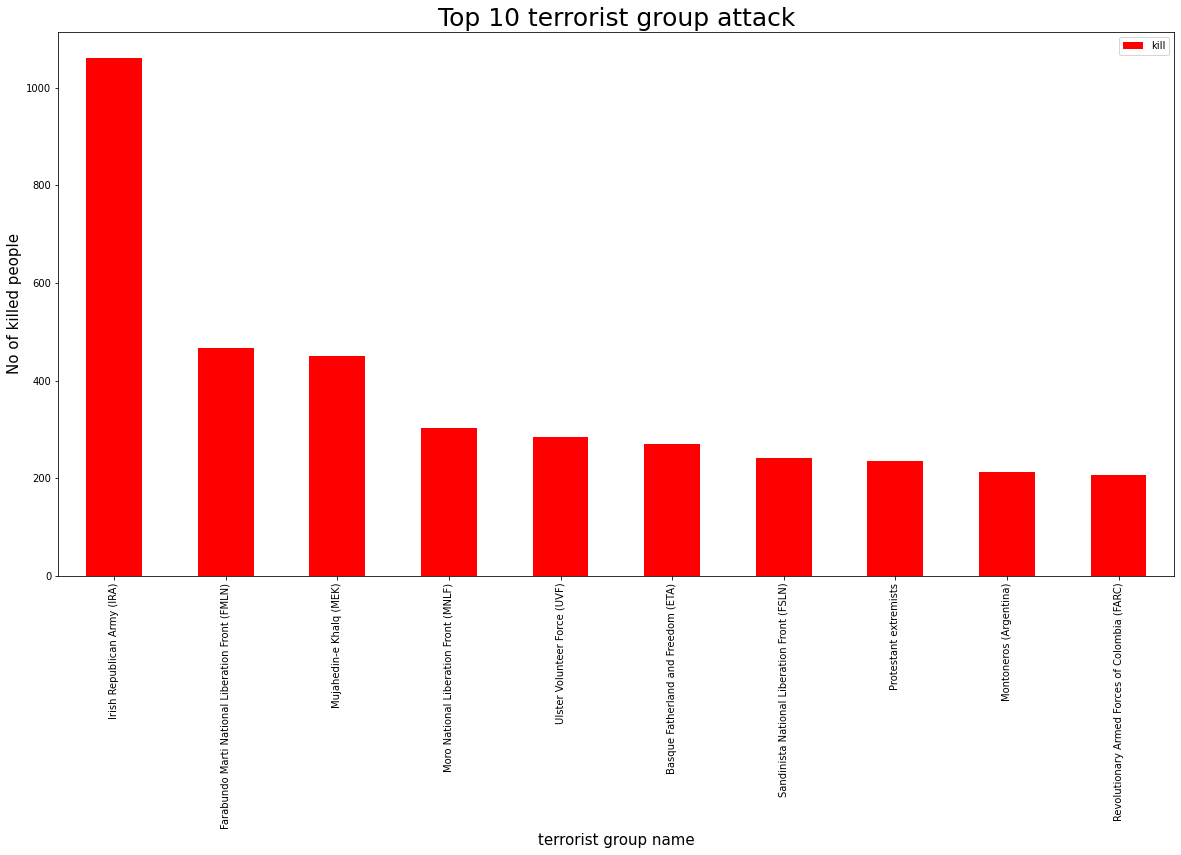

In [26]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [27]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,1027.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,466.0
2,Mujahedin-e Khalq (MEK),Iran,449.0
3,Moro National Liberation Front (MNLF),Philippines,302.0
4,Basque Fatherland and Freedom (ETA),Spain,269.0
5,Ulster Volunteer Force (UVF),United Kingdom,247.0
6,Sandinista National Liberation Front (FSLN),Nicaragua,238.0
7,Protestant extremists,United Kingdom,232.0
8,Montoneros (Argentina),Argentina,212.0
9,Revolutionary Armed Forces of Colombia (FARC),Colombia,207.0


In [28]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,...,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,19.0,328.0,3.0,9.0,0.0,0.0,6.0,...,195.0,4.0,3.0,38.0,59.0,0.0,2.0,1.0,5.0,4.0


In [29]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 10514


In [30]:
Number_of_Wounded = data.loc[:,"Wound"]
print('Number of people wounded by terror attack:', int(sum(Number_of_Wounded.dropna())))

Number of people wounded by terror attack: 11180


# Observation
(i) Maximum number of attacks in 2014 in "Middle East & north Africa".

(ii) 'Taliban' group attacks most and most attack types : Bombing/Explosion

(iii) Minimum number of attacks in 1971 in "Australasia & Oceania" caused 282 Casualities

(iv) Country with the most attacks: Iraq and most attacked city : Baghdad

(v) ) Casualities consists of 411868 deaths and 523869 peoples were wounded